In [2]:
import pickle 
import os
from datetime import datetime,timezone,timedelta
import pickle

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from scipy import signal

import data_filter as dafi
import data_process as dapr
import lib_plot
import import_other_datasource as imoda

In [5]:
with open('../data/generated_data/270to330/timeseries_ele30_time30.pkl', 'rb') as f:
    ts_30_30_dict = pickle.load(f)

retrack_method = 'OCES'

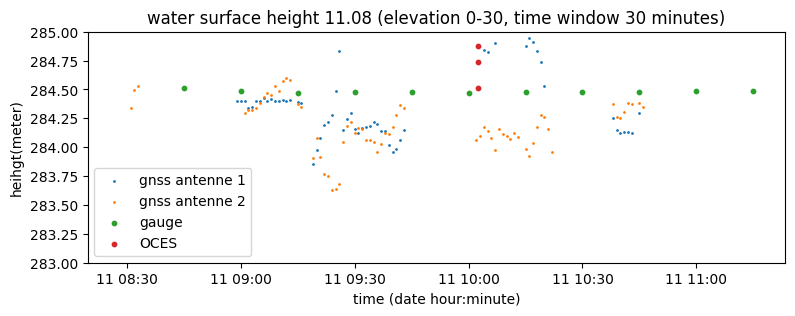

In [6]:
# from gnss-r
date_key = '0811'
ts_0811_2 = ts_30_30_dict[f'{date_key}_2']
ts_0811_3 = ts_30_30_dict[f'{date_key}_3']
ante_h_0811 = imoda.get_antenne_height(date_key)
# from sentinel
ts_sentinel_0811 = imoda.get_sentinel_data(date_key,retrack_method)
# from gauge
ts_gauge_0811 = imoda.get_gauge_data(date_key)
lib_plot.plot_timeseries(ts_0811_2, ts_0811_3, ante_h_0811['2'], ante_h_0811['3'],\
     ts_gauge_0811, ts_sentinel_0811, retrack_method, date_key)

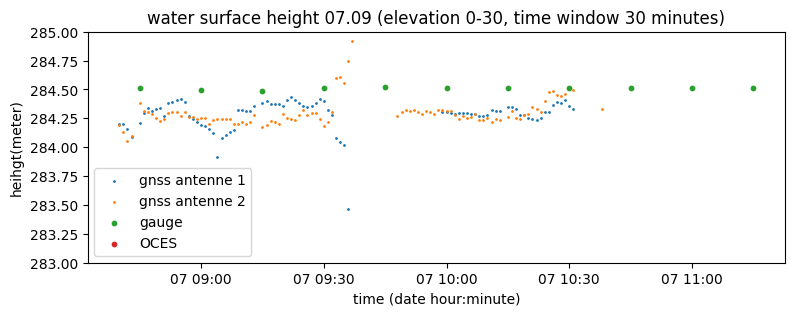

In [7]:
# from gnss-r
date_key = '0907'
ts_0811_2 = ts_30_30_dict[f'{date_key}_2']
ts_0811_3 = ts_30_30_dict[f'{date_key}_3']
ante_h_0811 = imoda.get_antenne_height(date_key)
# from sentinel
ts_sentinel_0811 = imoda.get_sentinel_data(date_key,retrack_method)
# from gauge
ts_gauge_0811 = imoda.get_gauge_data(date_key)
lib_plot.plot_timeseries(ts_0811_2, ts_0811_3, ante_h_0811['2'], ante_h_0811['3'],\
     ts_gauge_0811, ts_sentinel_0811, retrack_method, date_key)

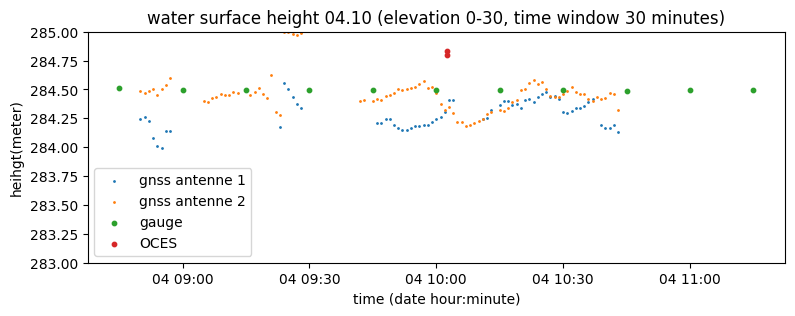

In [8]:
# from gnss-r
date_key = '1004'
ts_0811_2 = ts_30_30_dict[f'{date_key}_2']
ts_0811_3 = ts_30_30_dict[f'{date_key}_3']
ante_h_0811 = imoda.get_antenne_height(date_key)
# from sentinel
ts_sentinel_0811 = imoda.get_sentinel_data(date_key,retrack_method)
# from gauge
ts_gauge_0811 = imoda.get_gauge_data(date_key)
lib_plot.plot_timeseries(ts_0811_2, ts_0811_3, ante_h_0811['2'], ante_h_0811['3'],\
     ts_gauge_0811, ts_sentinel_0811, retrack_method, date_key)

In [10]:
# 1031 no antenne height yet
date_key = '1031'
ts_1031_2 = ts_30_30_dict[f'{date_key}_2']
ts_1031_3 = ts_30_30_dict[f'{date_key}_3']
ante_h_1031 = imoda.get_antenne_height(date_key)
h_ts_1031_2 = ante_h_1031['2'] - np.asarray(list(ts_1031_2.values()))
h_ts_1031_3 = ante_h_1031['3'] - np.asarray(list(ts_1031_3.values()))
gauge_time_1031,h_ts_gauge_1031 = imoda.get_gauge_data(date_key)


plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1031_2.keys()), list(h_ts_1031_2),s=1)
ax.scatter(list(ts_1031_3.keys()), list(h_ts_1031_3),s=1)
ax.scatter(gauge_time_1031,h_ts_gauge_1031,s=10)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('water surface height 31.Oct (elevation 0-30, time window 30 minutes)')
ax.set_ylim([283,285])
fig.set_size_inches(9,3)
fig.savefig('picture/timeseries1031.png')

ValueError: too many values to unpack (expected 2)

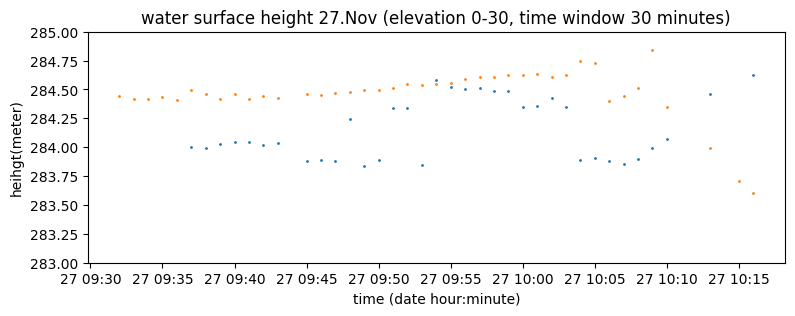

In [21]:
# 1127 no antenne height yet
date_key = '1127'
ts_1127_2 = ts_30_30_dict[f'{date_key}_2']
ts_1127_3 = ts_30_30_dict[f'{date_key}_3']
ante_h_1127 = imoda.get_antenne_height(date_key)
h_ts_1127_2 = ante_h_1127['2'] - np.asarray(list(ts_1127_2.values()))
h_ts_1127_3 = ante_h_1127['3'] - np.asarray(list(ts_1127_3.values()))
gauge_time_1127,h_ts_gauge_1127 = imoda.get_gauge_data(date_key)


plt.rcParams.update({'font.size': 10})
fig,ax = plt.subplots()
ax.scatter(list(ts_1127_2.keys()), list(h_ts_1127_2),s=1)
ax.scatter(list(ts_1127_3.keys()), list(h_ts_1127_3),s=1)
ax.scatter(gauge_time_1127,h_ts_gauge_1127,s=10)
ax.set_xlabel('time (date hour:minute)')
ax.set_ylabel('heihgt(meter)')
ax.set_title('water surface height 27.Nov (elevation 0-30, time window 30 minutes)')
ax.set_ylim([283,285])
fig.set_size_inches(9,3)
fig.savefig('picture/timeseries1127.png')